In [1]:
from torch import nn, optim
import SuperFirstMegaNetwork
from SuperFirstMegaNetwork import PrimeNet, train_model, SewnConvNet, make_connector_1conv, make_connector_2conv

Loaded 500 out of 144722 apples
Loaded 500 out of 209447 spiders
Loaded 500 out of 150152 octopuss
Loaded 500 out of 116685 snowflakes
X shape: (2000, 784), type:uint8


In [2]:
model1=PrimeNet(nn.ReLU, nn.MaxPool2d,2,0,0, k_size=5 )
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)
epoch_num=20

output size conv_block: 16.0
output size conv_block: 32.0
output size beetween: 32.0
linear input size: 2048


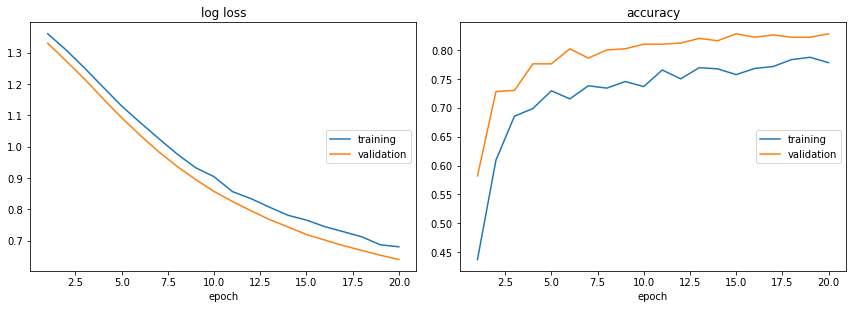

log loss:
training   (min:    0.681, max:    1.361, cur:    0.681)
validation (min:    0.640, max:    1.330, cur:    0.640)

accuracy:
training   (min:    0.437, max:    0.787, cur:    0.778)
validation (min:    0.582, max:    0.828, cur:    0.828)


In [3]:
model1_trained = train_model(model1, criterion, optimizer1, num_epochs=epoch_num)

In [4]:
net_before = nn.Sequential(
    model1.conv_block[0]
)

net_after=nn.Sequential(
    model1.conv_block[1],
    *model1.conv,
    model1.linear_first,
    *model1.linear,
    model1.fc
)

In [5]:
layer_cut=1

In [6]:
connector = make_connector_1conv(model1.give_num_of_ch_in_when_cut(layer_cut),model1.give_num_of_ch_out_when_cut(layer_cut))

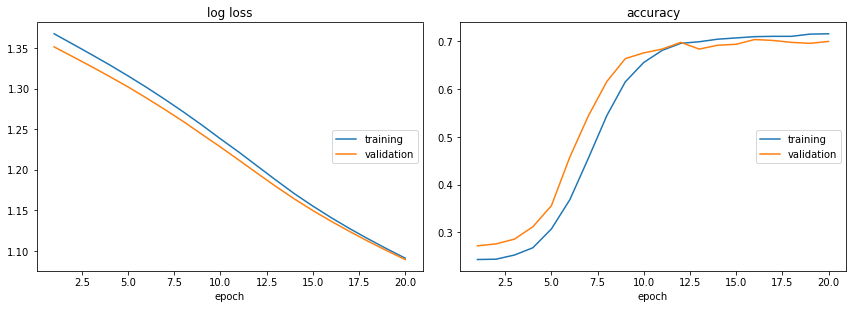

log loss:
training   (min:    1.091, max:    1.368, cur:    1.091)
validation (min:    1.089, max:    1.352, cur:    1.089)

accuracy:
training   (min:    0.243, max:    0.716, cur:    0.716)
validation (min:    0.272, max:    0.704, cur:    0.700)


In [7]:
sewn_model2 = SewnConvNet(net_before, net_after, connector)
optimizer = optim.Adam(sewn_model2.parameters(), lr=1e-4)

sewn_model2_trained = train_model(sewn_model2, criterion, optimizer, num_epochs=20)

In [8]:
model2=PrimeNet(nn.ReLU, nn.MaxPool2d,1,2,1 )
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)
epoch_num=20

output size conv_block: 16.0
output size beetween: 16.0
output size conv: 16.0
output size conv: 16.0
linear input size: 4096
output size linear: 128


In [ ]:
model2_trained = train_model(model2, criterion, optimizer1, num_epochs=epoch_num)